Using custom data configuration default
Reusing dataset climate_fever (/Users/jiaweiqian/.cache/huggingface/datasets/climate_fever/default/1.0.1/3b846b20d7a37bc0019b0f0dcbde5bf2d0f94f6874f7e4c398c579f332c4262c)


['Global', 'warming', 'is', 'driving', 'polar', 'bears', 'toward', 'extinction']
['The', 'sun', 'has', 'gone', 'into', '‘lockdown’', 'which', 'could', 'cause', 'freezing', 'weather,', 'earthquakes', 'and', 'famine,', 'say', 'scientists']
['The', 'polar', 'bear', 'population', 'has', 'been', 'growing.']
["Ironic'", 'study', 'finds', 'more', 'CO2', 'has', 'slightly', 'cooled', 'the', 'planet']
co2
['Human', 'additions', 'of', 'CO2', 'are', 'in', 'the', 'margin', 'of', 'error', 'of', 'current', 'measurements', 'and', 'the', 'gradual', 'increase', 'in', 'CO2', 'is', 'mainly', 'from', 'oceans', 'degassing', 'as', 'the', 'planet', 'slowly', 'emerges', 'from', 'the', 'last', 'ice', 'age.']
co2
co2
['They', 'tell', 'us', 'that', 'we', 'are', 'the', 'primary', 'forces', 'controlling', 'earth', 'temperatures', 'by', 'the', 'burning', 'of', 'fossil', 'fuels', 'and', 'releasing', 'their', 'carbon', 'dioxide.']
['The', 'Great', 'Barrier', 'Reef', 'is', 'experiencing', 'the', 'most', 'widespread', '

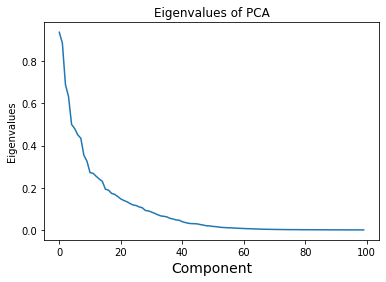

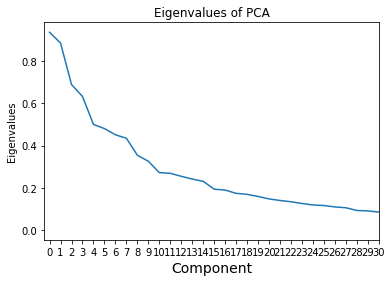

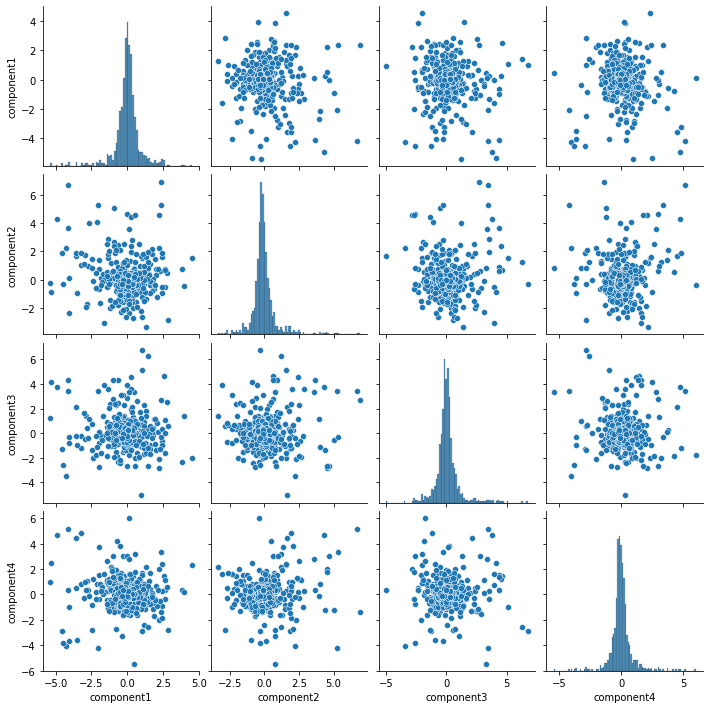

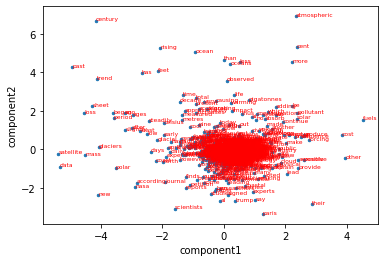

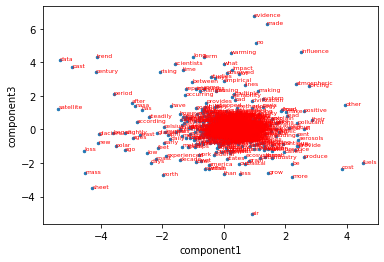

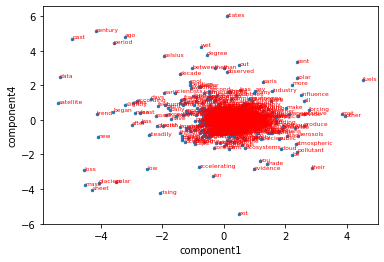

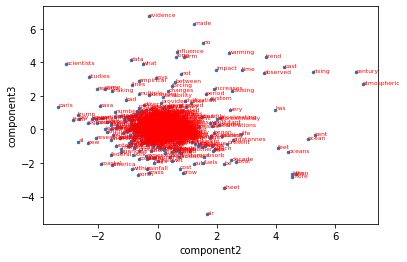

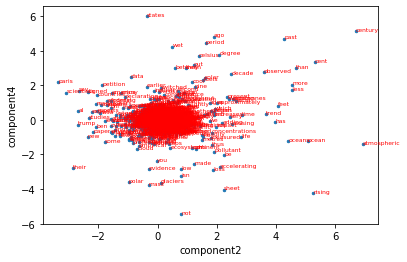

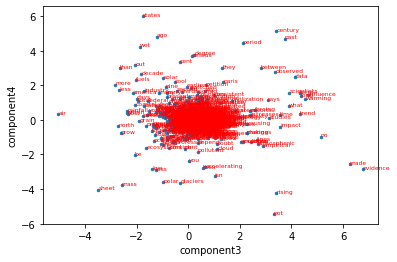

The average cos difference between two vectors is:0.1074003936
the cosine between “sun” + “cold” – “hot” and “colder” in PCA model is 0.629017
the cosine between “temperature” + “raise” – “cold” and “seas” in PCA model is 0.667581
the cosine between “temperature” + “cold” – “hot” and “latitude” in PCA model is 0.629017
the cosine between “weather” + “cold” – “hot” and “extreme” in PCA model is 0.801503
the cosine between “earth” + “life” – “carbon” and “dead” in PCA model is 0.242309
the cosine between “atmosphere” + “cold” – “carbon” and “winter” in PCA model is 0.795140


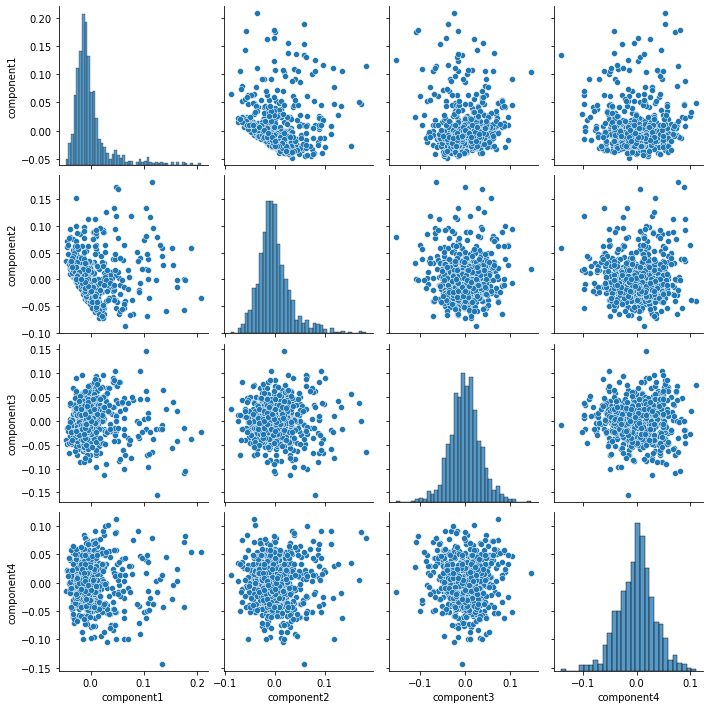

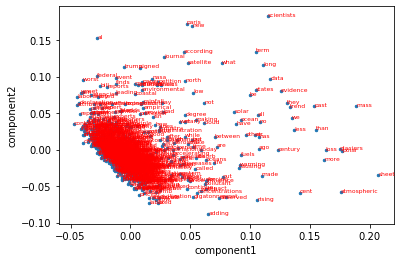

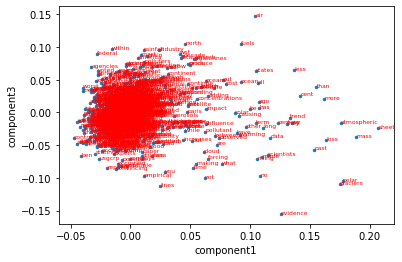

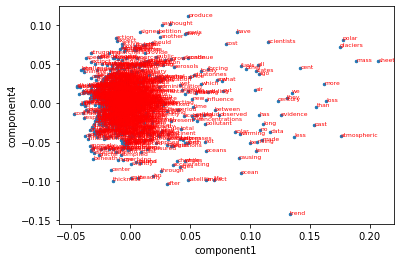

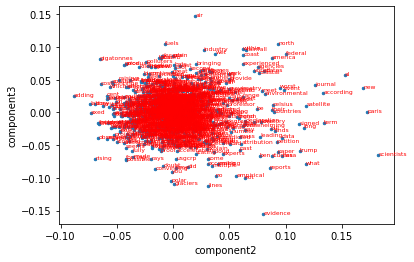

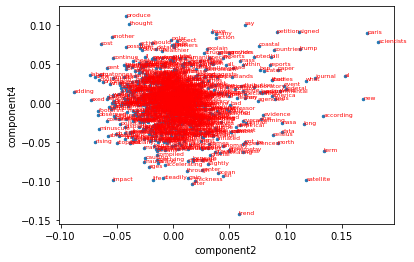

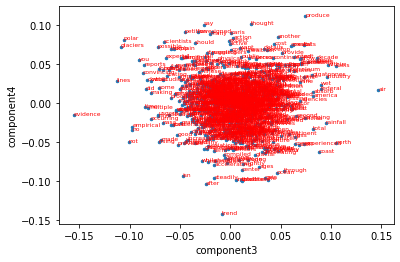

The average cos difference between two vectors is:0.3596847168
the cosine between “sun” + “cold” – “hot” and “colder” in LLE model is 0.704557
the cosine between “temperature” + “raise” – “cold” and “seas” in LLE model is -0.027320
the cosine between “temperature” + “cold” – “hot” and “latitude” in LLE model is 0.704557
the cosine between “weather” + “cold” – “hot” and “extreme” in LLE model is 0.991517
the cosine between “earth” + “life” – “carbon” and “dead” in LLE model is 0.807145
the cosine between “atmosphere” + “cold” – “carbon” and “winter” in LLE model is 0.774336


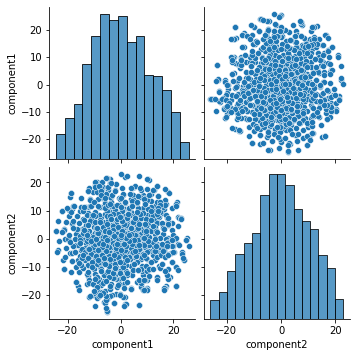

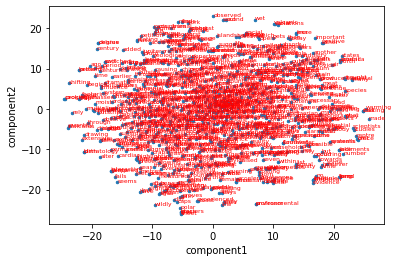

The average cos difference between two vectors is:0.6077712610
the cosine between “sun” + “cold” – “hot” and “colder” in t-SNE model is 0.231896
the cosine between “temperature” + “raise” – “cold” and “seas” in t-SNE model is -0.262096
the cosine between “temperature” + “cold” – “hot” and “latitude” in t-SNE model is 0.231896
the cosine between “weather” + “cold” – “hot” and “extreme” in t-SNE model is 0.873538
the cosine between “earth” + “life” – “carbon” and “dead” in t-SNE model is 0.984217
the cosine between “atmosphere” + “cold” – “carbon” and “winter” in t-SNE model is 0.999968


In [1]:
from datasets import load_dataset
dataset = load_dataset('climate_fever')['test']
#print(dataset['claim'])
import logging
import os
from gensim.models import Word2Vec
import gensim.models
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt;
import numpy as np

from sklearn.metrics.pairwise import cosine_similarity, paired_distances

#convert to vectors
class generate_key:
    def __init__(self, sentences):
        self.sentences = sentences

    def __iter__(self):
        for sentence in self.sentences:
            yield (gensim.utils.simple_preprocess(str(sentence)))


#word2vec model
data = generate_key(dataset['claim'])  #feature dataset and convert every word to vectors
w2v_model = gensim.models.Word2Vec(data, size=100, min_count=1, window=5, iter=50)
#train word2vec model
w2v_model.train(generate_key(dataset['claim']), total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

#target dataset
data_label = dataset['claim_label']

# iterate through each sentence in the file int
data = []
for i in range(len(dataset['claim'])):
    temp = []
    splited_string=dataset['claim'][i].split(' ')
    print(splited_string)
    for j in range(len(splited_string)):
        try:
            temp.append(w2v_model.wv[splited_string[j].lower().strip('‘’').replace(',','').replace('.','').replace('\'',"")])
        except BaseException:
            print(splited_string[j].lower())
    data.append(temp)

# Split data into train-val-test sets with portions 80-10-10 percent
y_target = generate_key(dataset['claim_label'])
x_train,x_test,y_train,y_test= train_test_split(data,data_label,test_size=0.2,random_state=0)


#print(len(x_train_split),len(y_train_split))

'''
CM2: PCA model
'''
# sentence_data=dataset['claim']
# x_train,x_test = train_test_split(sentence_data,test_size=0.2,random_state=0)
#
# #Get the training model for part1
# w2v_model_train = gensim.models.Word2Vec(generate_key(x_train), size=100, min_count=1, window=5, iter=50)
# #train word2vec model
# w2v_model_train.train(generate_key(x_train), total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

#Now first step get the vector representation of each vocab
voc_list=[];
voc_embedlist=[];
for voc in w2v_model.wv.vocab:
    voc_list.append(voc)
    voc_embedlist.append(w2v_model.wv[voc])

voc_embedlist_train,voc_embedlist_test,voc_list_train,voc_list_test=train_test_split(voc_embedlist,voc_list,test_size=0.2,random_state=0)
#We must centralize the voc_embedlist_train and test
voc_embedlist_train=np.array(voc_embedlist_train)
mean_list=[]
for i in range(voc_embedlist_train.shape[1]):
    mean_list.append(voc_embedlist_train[:,i].mean())
mean_list=np.array(mean_list)
mean_list=mean_list.reshape(1,voc_embedlist_train.shape[1])
#Centeralize
voc_embedlist_test=np.array(voc_embedlist_test)
voc_embedlist_train=voc_embedlist_train-mean_list
voc_embedlist_test=voc_embedlist_test-mean_list
#Then perform PCA on voc_embedlist

from matplotlib.pyplot import MultipleLocator
from sklearn.decomposition import PCA
import pandas as pd;
import seaborn as sns;
covar_matrix=PCA(n_components=voc_embedlist_train.shape[1])
covar_matrix.fit(voc_embedlist_train)
#three_dim = PCA(random_state=0).fit_transform(voc_embedlist)[:,:3]
# x_major_locator=MultipleLocator(1)
# ax=plt.gca()
# ax.xaxis.set_major_locator(x_major_locator)
# plt.xlim(-0.5,30)
plt.plot(covar_matrix.explained_variance_)
plt.xlabel('Numbers',fontsize=14)
plt.title('Eigenvalues of PCA')
plt.ylabel('Eigenvalues')
plt.xlabel('Component')
plt.show()
#Closer look scree plot
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim(-0.5,30)
plt.plot(covar_matrix.explained_variance_)
plt.xlabel('Numbers',fontsize=14)
plt.title('Eigenvalues of PCA')
plt.ylabel('Eigenvalues')
plt.xlabel('Component')
plt.show()

#We set the components to 12;

n_component=12;
covar_matrix=PCA(n_components=n_component)
covar_matrix.fit(voc_embedlist_train)
#Apply on test set
data_pca_transform=covar_matrix.transform(voc_embedlist_test)
df = pd.DataFrame(data_pca_transform, columns = ['component1','component2','component3','component4','component5','component6','component7','component8','component9','component10','component11','component12'])
sns.pairplot(df,vars=['component1','component2','component3','component4'])
plt.show()
#Pair plot with text word information
PCA_features=['component1','component2','component3','component4']
for i in range(len(PCA_features)):
    for j in range(i+1,len(PCA_features)):
        plt.scatter(df[PCA_features[i]], df[PCA_features[j]], s=6)
        plt.xlabel(PCA_features[i])
        plt.ylabel(PCA_features[j])
        for k, txt in enumerate(voc_list_test):
            plt.text(df[PCA_features[i]][k], df[PCA_features[j]][k], txt, fontsize=6,color='r')
        plt.show()
#calculate the differences of cosine of two vectors
#Compare that value in Word2Vec embedding 100-D and PCA 10-D
cos_difference_pca=0
count=0;
for i in range(len(voc_list_test)):
    for j in range(i+1,len(voc_list_test)):
        count=count+1
        embed_similarity=cosine_similarity(voc_embedlist_test[i].reshape(1,voc_embedlist_test[0].shape[0]),voc_embedlist_test[j].reshape(1,voc_embedlist_test[0].shape[0]))
        pca_similarity=cosine_similarity(data_pca_transform[i].reshape(1,n_component),data_pca_transform[j].reshape(1,n_component))
        cos_difference_pca=cos_difference_pca+abs(pca_similarity[0][0]-embed_similarity)
cos_difference_pca=cos_difference_pca/count
print('The average cos difference between two vectors is:%.10f'%cos_difference_pca)

#Check the arithmetic
pca_vector=covar_matrix.transform(voc_embedlist)
#build dictionary
PCA_dic={}
count=0
for i in voc_list:
    PCA_dic[i]=pca_vector[count]
    count=count+1
#Some examples
temp=cosine_similarity((PCA_dic['sun']+PCA_dic['cold']-PCA_dic['hot']).reshape(1,12),PCA_dic['colder'].reshape(1,12))
print('the cosine between “sun” + “cold” – “hot” and “colder” in PCA model is %f'%temp)

temp=cosine_similarity((PCA_dic['temperature']+PCA_dic['raise']-PCA_dic['cold']).reshape(1,12),PCA_dic['seas'].reshape(1,12))
print('the cosine between “temperature” + “raise” – “cold” and “seas” in PCA model is %f'%temp)

temp=cosine_similarity((PCA_dic['sun']+PCA_dic['cold']-PCA_dic['hot']).reshape(1,12),PCA_dic['colder'].reshape(1,12))
print('the cosine between “temperature” + “cold” – “hot” and “latitude” in PCA model is %f'%temp)

temp=cosine_similarity((PCA_dic['weather']+PCA_dic['cold']-PCA_dic['hot']).reshape(1,12),PCA_dic['extreme'].reshape(1,12))
print('the cosine between “weather” + “cold” – “hot” and “extreme” in PCA model is %f'%temp)

temp=cosine_similarity((PCA_dic['earth']+PCA_dic['life']-PCA_dic['carbon']).reshape(1,12),PCA_dic['dead'].reshape(1,12))
print('the cosine between “earth” + “life” – “carbon” and “dead” in PCA model is %f'%temp)

temp=cosine_similarity((PCA_dic['atmosphere']+PCA_dic['cold']-PCA_dic['carbon']).reshape(1,12),PCA_dic['winter'].reshape(1,12))
print('the cosine between “atmosphere” + “cold” – “carbon” and “winter” in PCA model is %f'%temp)

'''
LLE method
'''
#Apply LLE method
import random
from sklearn.manifold import LocallyLinearEmbedding
#Tune the parameter of n_neighbors
best_k=1;
best_cos_difference_lle=10;
for k in range(3,100):
    LLE=LocallyLinearEmbedding(n_components=4,n_neighbors=k)
    cos_difference_lle=0
    count=0;
    data_lle_transform_test = LLE.fit_transform(voc_embedlist_test)
    #iterate 10000 times
    for iter in range(10000):
        voc1_pos=random.randint(0,voc_embedlist_test.shape[0]-1)
        voc2_pos=random.randint(0,voc_embedlist_test.shape[0]-1)
        count=count+1
        embed_similarity = cosine_similarity(voc_embedlist_test[voc1_pos].reshape(1, voc_embedlist_test[0].shape[0]),
                                             voc_embedlist_test[voc2_pos].reshape(1, voc_embedlist_test[0].shape[0]))
        lle_similarity=cosine_similarity(data_lle_transform_test[voc1_pos].reshape(1,4),data_lle_transform_test[voc2_pos].reshape(1,4))
        cos_difference_lle=cos_difference_lle+abs(lle_similarity[0][0]-embed_similarity)
    cos_difference_lle=cos_difference_lle/count
    if cos_difference_lle<best_cos_difference_lle:
        best_cos_difference_lle=cos_difference_lle
        best_k=k

best_k=49
#Apply the best parameter on test set
lle_components=4
LLE = LocallyLinearEmbedding(n_components=lle_components, n_neighbors=best_k)
data_lle_transform=LLE.fit_transform(voc_embedlist_test)
df_lle = pd.DataFrame(data_lle_transform, columns = ['component1','component2','component3','component4'])
sns.pairplot(df_lle,vars=['component1','component2','component3','component4'])
plt.show()

#calculate the differences of cosine of two vectors
#Pair plot with text word information
LLE_features=['component1','component2','component3','component4']
for i in range(len(LLE_features)):
    for j in range(i+1,len(LLE_features)):
        plt.scatter(df_lle[LLE_features[i]], df_lle[LLE_features[j]], s=6)
        plt.xlabel(LLE_features[i])
        plt.ylabel(LLE_features[j])
        for k, txt in enumerate(voc_list_test):
            plt.text(df_lle[LLE_features[i]][k], df_lle[LLE_features[j]][k], txt, fontsize=6,color='r')
        plt.show()

#Compare that value in Word2Vec embedding 100-D and LLE 4-D
cos_difference_lle=0
count=0;
for i in range(len(voc_list_test)):
    for j in range(i+1,len(voc_list_test)):
        count=count+1
        embed_similarity = cosine_similarity(voc_embedlist_test[i].reshape(1, voc_embedlist_test[0].shape[0]),
                                             voc_embedlist_test[j].reshape(1, voc_embedlist_test[0].shape[0]))
        lle_similarity=cosine_similarity(data_lle_transform[i].reshape(1,lle_components),data_lle_transform[j].reshape(1,lle_components))
        cos_difference_lle=cos_difference_lle+abs(lle_similarity[0][0]-embed_similarity)
cos_difference_lle=cos_difference_lle/count
print('The average cos difference between two vectors is:%.10f'%cos_difference_lle)
#Check the arithmetic
lle_vector=LLE.transform(voc_embedlist)
#build dictionary
lle_dic={}
count=0
for i in voc_list:
    lle_dic[i]=lle_vector[count]
    count=count+1
#Some examples
temp=cosine_similarity((lle_dic['sun']+lle_dic['cold']-lle_dic['hot']).reshape(1,4),lle_dic['colder'].reshape(1,4))
print('the cosine between “sun” + “cold” – “hot” and “colder” in LLE model is %f'%temp)

temp=cosine_similarity((lle_dic['temperature']+lle_dic['raise']-lle_dic['cold']).reshape(1,4),lle_dic['seas'].reshape(1,4))
print('the cosine between “temperature” + “raise” – “cold” and “seas” in LLE model is %f'%temp)

temp=cosine_similarity((lle_dic['sun']+lle_dic['cold']-lle_dic['hot']).reshape(1,4),lle_dic['colder'].reshape(1,4))
print('the cosine between “temperature” + “cold” – “hot” and “latitude” in LLE model is %f'%temp)

temp=cosine_similarity((lle_dic['weather']+lle_dic['cold']-lle_dic['hot']).reshape(1,4),lle_dic['extreme'].reshape(1,4))
print('the cosine between “weather” + “cold” – “hot” and “extreme” in LLE model is %f'%temp)

temp=cosine_similarity((lle_dic['earth']+lle_dic['life']-lle_dic['carbon']).reshape(1,4),lle_dic['dead'].reshape(1,4))
print('the cosine between “earth” + “life” – “carbon” and “dead” in LLE model is %f'%temp)

temp=cosine_similarity((lle_dic['atmosphere']+lle_dic['cold']-lle_dic['carbon']).reshape(1,4),lle_dic['winter'].reshape(1,4))
print('the cosine between “atmosphere” + “cold” – “carbon” and “winter” in LLE model is %f'%temp)

'''
t-SNE part
'''
import random
from sklearn.manifold import TSNE


#Apply the best parameter on test set
tsne_components=2
TSNE_model=TSNE(n_components=tsne_components)
data_tsne_transform=TSNE_model.fit_transform(voc_embedlist_test)

df_tsne = pd.DataFrame(data_tsne_transform, columns = ['component1','component2'])
sns.pairplot(df_tsne,vars=['component1','component2'])
plt.show()

#calculate the differences of cosine of two vectors
#Pair plot with text word information
tsne_features=['component1','component2']
for i in range(len(tsne_features)):
    for j in range(i+1,len(tsne_features)):
        plt.scatter(df_tsne[tsne_features[i]], df_tsne[tsne_features[j]], s=6)
        plt.xlabel(tsne_features[i])
        plt.ylabel(tsne_features[j])
        for k, txt in enumerate(voc_list_test):
            plt.text(df_tsne[tsne_features[i]][k], df_tsne[tsne_features[j]][k], txt, fontsize=6,color='r')
        plt.show()

#Compare that value in Word2Vec embedding 100-D and t-SNE 2-D
cos_difference_tsne=0
count=0;
for i in range(len(voc_list_test)):
    for j in range(i+1,len(voc_list_test)):
        count=count+1
        embed_similarity = cosine_similarity(voc_embedlist_test[i].reshape(1, voc_embedlist_test[0].shape[0]),
                                             voc_embedlist_test[j].reshape(1, voc_embedlist_test[0].shape[0]))
        tsne_similarity=cosine_similarity(data_tsne_transform[i].reshape(1,tsne_components),data_tsne_transform[j].reshape(1,tsne_components))
        cos_difference_tsne=cos_difference_tsne+abs(tsne_similarity[0][0]-embed_similarity)
cos_difference_tsne=cos_difference_tsne/count
print('The average cos difference between two vectors is:%.10f'%cos_difference_tsne)

#Check the arithmetic
TSNE_model=TSNE(n_components=tsne_components)
tsne_vector=TSNE_model.fit_transform(voc_embedlist)
#build dictionary
tsne_dic={}
count=0
for i in voc_list:
    tsne_dic[i]=tsne_vector[count]
    count=count+1
#Some examples
temp=cosine_similarity((tsne_dic['sun']+tsne_dic['cold']-tsne_dic['hot']).reshape(1,2),tsne_dic['colder'].reshape(1,2))
print('the cosine between “sun” + “cold” – “hot” and “colder” in t-SNE model is %f'%temp)

temp=cosine_similarity((tsne_dic['temperature']+tsne_dic['raise']-tsne_dic['cold']).reshape(1,2),tsne_dic['seas'].reshape(1,2))
print('the cosine between “temperature” + “raise” – “cold” and “seas” in t-SNE model is %f'%temp)

temp=cosine_similarity((tsne_dic['sun']+tsne_dic['cold']-tsne_dic['hot']).reshape(1,2),tsne_dic['colder'].reshape(1,2))
print('the cosine between “temperature” + “cold” – “hot” and “latitude” in t-SNE model is %f'%temp)

temp=cosine_similarity((tsne_dic['weather']+tsne_dic['cold']-tsne_dic['hot']).reshape(1,2),tsne_dic['extreme'].reshape(1,2))
print('the cosine between “weather” + “cold” – “hot” and “extreme” in t-SNE model is %f'%temp)

temp=cosine_similarity((tsne_dic['earth']+tsne_dic['life']-tsne_dic['carbon']).reshape(1,2),tsne_dic['dead'].reshape(1,2))
print('the cosine between “earth” + “life” – “carbon” and “dead” in t-SNE model is %f'%temp)

temp=cosine_similarity((tsne_dic['atmosphere']+tsne_dic['cold']-tsne_dic['carbon']).reshape(1,2),tsne_dic['winter'].reshape(1,2))
print('the cosine between “atmosphere” + “cold” – “carbon” and “winter” in t-SNE model is %f'%temp)

